In [2]:
# import sys
# sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import CalHMM
import numpy as np
import matplotlib.pyplot as plt
import hmmlearn.hmm
import warnings
warnings.filterwarnings('ignore')
import imp

In [3]:
plt.show(block=True)

In [ ]:
imp.reload(CalHMM)

## a. Load data

In [4]:
folder = '/home/kemerelab/Documents/599/KQ095_210205' #dan_CA1'  #'KQ095_210205' #KQ086_210110' #
timebin = 500

In [5]:
data = np.load(f'{folder}/tb_{timebin}/timebin_{timebin}.npz') #{folder}/timebin_500.npz
Distance = data['Distance']
lap_end = [] #data['lap_end']
idx = data['idx']
del data

Spike = np.load(f'{folder}/tb_{timebin}/timebin_{timebin}_spks.npy')

Spike.shape, Distance.shape #, idx.shape # Spike should be of shape (#sample, #neuron)

((1821, 219), (1821,))

In [ ]:
plt.plot(Spike[:,30])

## b. Run Poisson HMM
### Original data

In [6]:
origin = hmmlearn.hmm.PoissonHMM(n_components=20) 
origin.fit(Spike)

x1, plst1, occ1, posterior_states1, pos_COM1 = CalHMM.comp_poststates_pos(origin, Spike, Distance, sort='angle')
err_rate1, dev1, Decoded_position1 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states1, pos_COM1, mode = 'circle')

print(f'Error Rate: {err_rate1}')

Error Rate: 0.17762433792802512


In [ ]:
plt.matshow(x1)

In [ ]:
plt.figure()
plt.plot(x1[1,:])

In [ ]:
plt.plot(pos_COM1)
plt.plot(pos_COM1[plst1])

In [ ]:
pos_COM1.shape

In [ ]:
d=np.unique(Distance)
dif=d[1]-d[0]
dif

In [ ]:
d=np.unique(Distance)
dif=d[1]-d[0]
plt.matshow(x1)
for i,pos in enumerate(pos_COM1[plst1]):
    line, = plt.plot(pos/dif,i,'r*')
line.set_label('most probable position')
plt.title('Fish, CA1, 500ms timebin')
plt.legend()

In [ ]:
d=np.unique(Distance)
dif=d[1]-d[0]
plt.matshow(x1)
for i,pos in enumerate(pos_COM1[plst1]):
    line, = plt.plot(pos/dif,i,'r*')
line.set_label('most probable position')
plt.title('Fish, CA1, 500ms timebin')
plt.legend()

In [ ]:
%matplotlib

In [ ]:
plt.matshow(-posterior_states1[:,plst1].T, cmap = 'gray')
plt.plot(Distance/Distance.max()*20, label='position')

In [ ]:
_, _, _, _, _, _ = CalHMM.show_all_plots(origin, Spike, Distance, lap_end, t_st=100, t_duration=600,vmax=.2)

### Time Shuffle

In [ ]:
ts_Spike = CalHMM.get_time_shuffle(Spike)
ts = hmmlearn.hmm.PoissonHMM(n_components=20) 
ts.fit(ts_Spike)

x2, plst2, occ2, posterior_states2, pos_COM2 = CalHMM.comp_poststates_pos(ts, Spike, Distance)
err_rate2, dev2, Decoded_position2 = CalHMM.comp_decoded_pos_acc(Distance, posterior_states2, pos_COM2)

print(f'Error Rate: {err_rate2}')

In [ ]:
_, _, _, _, _, _ = CalHMM.show_all_plots(ts, Spike, Distance, lap_end, t_st=200, t_duration=300,vmax=.2)

## c. Save and Reolad

In [ ]:
save = False
if save==True:
    CalHMM.save_object(origin, f'{folder}/timebin_{timebin}_spk_origin.pkl')
    CalHMM.save_object(ts, f'{folder}/timebin_{timebin}_spk_ts.pkl')
    CalHMM.save_object(trsn, f'{folder}/timebin_{timebin}_spk_trsn.pkl')

In [ ]:
origin = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_origin.pkl')
ts = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_ts.pkl')
trsn = CalHMM.load_object(f'{folder}/timebin_{timebin}_spk_trsn.pkl')

## Check coactivation in states

In [ ]:
origin.means_.shape

In [ ]:
%matplotlib

In [ ]:
# plt.matshow(origin.means_,vmax=3)
# plt.colorbar()

In [ ]:
# n=plst1[8]
# means=origin.means_[n,:]
# thr=means.mean()+3*means.std()
# nn=np.where(origin.means_[n,:]>thr)[0]
# plt.plot(means)
# plt.plot([0,origin.means_.shape[1]],[thr,thr])
# plt.plot(nn, means[nn],'*')
# plt.xlabel('#neuron')
# plt.ylabel('value in mean matrix')
# plt.title(f'{n}th state before sorting')
# print(nn)

In [ ]:
# plt.figure(figsize=(15,4))
# s=np.where(np.argmax(posterior_states1, axis = 1)==i)[0]

# for j,i in enumerate(nn):
#     t=Spike[:,i].copy()
#     t=t/np.max(t)
#     plt.plot(t+j, label=f'{i}')

# plt.plot(s,np.zeros_like(s),'*')
# plt.legend()

In [ ]:
%matplotlib

In [ ]:
# for i,s in enumerate(Spike):
#     plt.plot(s+i*100)
# plt.show()

In [ ]:
%matplotlib inline

In [ ]:
neuron=10


In [ ]:
# plt.figure()
# for i in range(10):
#     means=origin.means_[:,i]
#     thr=means.mean()+means.std()
#     nn=np.where(means>thr)[0]
#     plt.plot(means)
# #     plt.plot([0,origin.means_.shape[0]],[thr,thr])
# #     plt.plot([0,origin.means_.shape[0]],[means.mean(),means.mean()],label='mean')
# #     plt.plot([0,origin.means_.shape[0]],[means.std(),means.std()],label='std')
    
#     plt.plot(nn, means[nn],'*')
#     plt.xlabel('#state')
#     plt.ylabel('value in mean matrix')
# #     plt.title(f'{n}th state before sorting')
#     print(nn)

In [ ]:
origin.means_.shape

Text(0, 0.5, '# State')

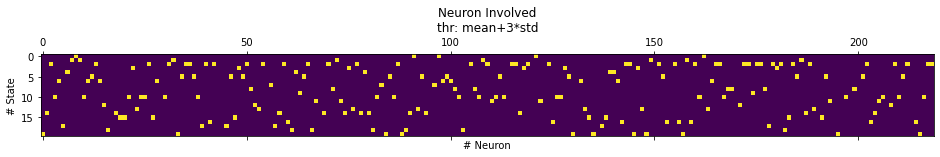

In [7]:
nn=[]
neuron_inv = np.zeros_like(origin.means_)
for i in range(origin.means_.shape[1]):
    means=origin.means_[:,i]
    thr=means.mean()+3*means.std()
    nn.append(np.where(means>thr)[0])
    neuron_inv[np.where(means>thr)[0],i]=1
    
plt.matshow(neuron_inv)
plt.title('Neuron Involved\nthr: mean+3*std')
plt.xlabel('# Neuron')
plt.ylabel('# State')

In [ ]:
state=plst1[8]
# plt.figure(figsize=(15,4))
# s=np.where(np.argmax(posterior_states1, axis = 1)==state)[0]

# for i,j in enumerate(np.where(neuron_inv[state,:])[0]):
#     t=Spike[:,j].copy()
#     t=t/origin.means_[state,j]
# #     t=t/np.max(t)
#     plt.plot(t+i, label=f'{j}')

# plt.plot(s,np.zeros_like(s),'*')
# plt.legend()

In [24]:
state=2
xx = Spike[np.concatenate((np.where(idx==state)[0],np.where(idx!=state)[0])),:].copy()
xx = xx[:,np.where(neuron_inv[state,:])[0]]
xx/=np.max(xx,axis=0)
# #     xx/=np.sum(xx,axis=1)[:,np.newaxis]
# # xx/=origin.means_[state,np.where(neuron_inv[state,:])[0]]
# plt.matshow(xx.T)
# plt.xlabel(f'timebin of state {state}')
# plt.ylabel('involved neurons')
# plt.plot([np.where(idx==state)[0].shape[0],np.where(idx==state)[0].shape[0]],[0,np.where(neuron_inv[state,:])[0].shape[0]-1],'r--')
# # plt.plot(s,np.zeros_like(s),'*')
# plt.show()
# print(np.where(neuron_inv[state,:])[0])

In [23]:
%matplotlib inline

In [31]:
state=4
xx = Spike[np.concatenate((np.where(idx==state)[0],np.where(idx!=state)[0])),:].copy()
xx = xx[:,np.where(neuron_inv[state,:])[0]]
xx/=np.max(xx,axis=0)

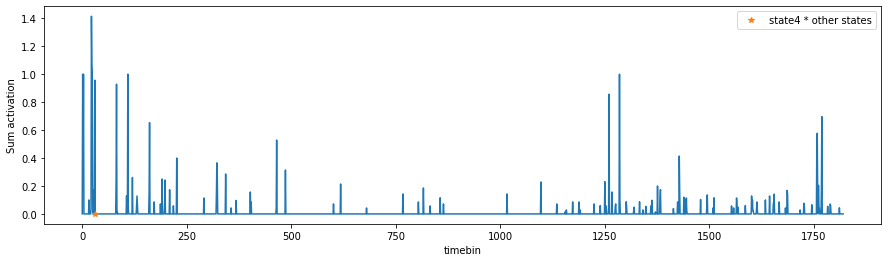

In [32]:
plt.figure(figsize=(15,4))
plt.plot(xx.sum(axis=1))
plt.plot(np.where(idx==state)[0].shape[0],0,'*',label=f'state{state} * other states')
plt.ylabel('Sum activation')
plt.xlabel('timebin')
plt.legend()

In [11]:
idx=np.argmax(posterior_states1, axis = 1)

In [12]:
state=0
tb=np.where(idx==state)[0]

[   7   15   26   29   37   39   42   57   63   68   78   85  106  118
  132  145  151  161  170  174  179  183  187  190  207  220  223  224
  245  246  248  249  258  259  260  261  273  274  275  276  287  288
  289  290  291  294  295  301  303  304  305  308  310  311  322  323
  325  336  337  339  351  352  354  366  369  381  382  383  385  386
  395  396  397  398  399  400  412  413  414  415  419  428  429  431
  460  466  467  468  469  470  475  482  483  484  485  494  496  497
  498  499  510  511  512  513  523  524  525  526  527  537  538  539
  540  552  553  554  555  556  570  571  572  584  585  586  587  601
  602  603  605  618  620  621  634  647  648  649  651  663  664  665
  666  667  677  678  692  693  694  706  707  708  721  724  735  736
  737  750  751  752  766  767  768  769  770  787  788  800  815  816
  817  818  829  830  832  850  869  870  871  884  885  886  897  898
  899  900  910  911  912  913  914  915  925  926  927  928  939  940
  941 

In [13]:
h=np.ones_like(tb)*(np.where(neuron_inv[state,:])[0].shape[0]-1)
xx = Spike[:,np.where(neuron_inv[state,:])[0]]
xx/=np.max(xx,axis=0)

In [14]:
xx.shape

(1821, 5)

In [1]:
import matplotlib
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [9]:
%matplotlib

Using matplotlib backend: GTK3Agg


In [ ]:

#     xx/=np.sum(xx,axis=1)[:,np.newaxis]
# xx/=origin.means_[state,np.where(neuron_inv[state,:])[0]]
plt.matshow(xx.T)
plt.xlabel(f'timebin of state {state}')
plt.ylabel('involved neurons')
plt.stem(tb,h,'--')
plt.xlim(0,100)
plt.show()

print(np.where(neuron_inv[state,:])[0])

In [ ]:
plt.xlim(0,100)

In [ ]:
plt.stem([0,5,6],np.ones(3))

In [ ]:
print(np.where(np.argmax(posterior_states1, axis = 1)==state)[0])

In [ ]:
np.argmax(posterior_states1, axis = 1).shape